In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rk4DobPend(m1, m2, L1, L2, phi10, phi20, w10, w20, h, t_max, g=9.81, linearized=False):
    """
    m1, L1, phi10, w10 correspond to the mass length, initial angle, and initial angular velocity of the top pendulum
    m2, L2, phi20, w20 correspond to the same, but for the bottom pendulum
    h corresponds to the time step
    t_max corresponds to the greatest amout of time needed to calculate
    """
    
    phi10 = np.deg2rad(phi10)
    phi20 = np.deg2rad(phi10)
    def f1(t, phi1, phi2, w1, w2):
        return w1
    
    def g1(t, phi1, phi2, w1, w2, linearized):
        """Equations for phi1''=w1'"""
        if linearized:
            return (m2*g)*phi2/(m1*L1) - (m1+m2)*g*phi1/(m1*L1)
        
        return (-g*(2*m1+m2)*np.sin(phi1)-m2*g*np.sin(phi1-2*phi2)-2*np.sin(phi1-phi2)*m2*((w2**2)*L2+(w1**2)*L1*np.cos(phi1-phi2))) \
                /(L1*(2*m1+m2-m2*np.cos(2*phi1-2*phi2)))
    
    def f2(t, phi1, phi2, w1, w2):
        return w2
    
    def g2(t, phi1, phi2, w1, w2, linearized):
        """Equations for phi1''=w1'  """
        if linearized:
            return -(m2/m1+1)*g*phi2/L2 + (m1+m2)*g*phi1/(m1*L2)
        
        return (2*np.sin(phi1-phi2)*((w1**2)*L1*(m1+m2)+g*(m1+m2)*np.cos(phi1)+(w2**2)*L2*m2*np.cos(phi1-phi2))) \
            /(L2*(2*m1+m2-m2*np.cos(2*phi1-2*phi2)))

    
    Nsteps = t_max/h
    t_range = h*np.arange(Nsteps, dtype=np.float64)
    phi1 = np.zeros_like(t_range)
    phi2 = np.zeros_like(t_range)
    w1 = np.zeros_like(t_range)
    w2 = np.zeros_like(t_range)
    y = np.array([phi10, phi20, w10, w20], dtype=np.float64)
    
    A0 = np.zeros(4)
    A1 = np.zeros(4)
    A2 = np.zeros(4)
    A3 = np.zeros(4)
    
    for i, t in enumerate(t_range):
        phi1[i] = y[0]
        phi2[i] = y[1]
        w1[i] = y[2]
        w2[i] = y[3]
        
        k0 = h*f1(t, y[0], y[1], y[2], y[3])
        d0 = h*f2(t, y[0], y[1], y[2], y[3])
        l0 = h*g1(t, y[0], y[1], y[2], y[3], linearized=linearized)
        q0 = h*g2(t, y[0], y[1], y[2], y[3], linearized=linearized)
        A0[:] = k0, d0, l0, q0
        
        k1 = h*f1(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        d1 = h*f2(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0)
        l1 = h*g1(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0, linearized=linearized)
        q1 = h*g2(t + 0.5*h, y[0] + 0.5*k0, y[1] + 0.5*d0, y[2] + 0.5*l0, y[3] + 0.5*q0, linearized=linearized)
        A1[:] = k1, d1, l1, q1
        
        k2 = h*f1(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        d2 = h*f2(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1)
        l2 = h*g1(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1, linearized=linearized)
        q2 = h*g2(t + 0.5*h, y[0] + 0.5*k1, y[1] + 0.5*d1, y[2] + 0.5*l1, y[3] + 0.5*q1, linearized=linearized)
        A2[:] = k2, d2, l2, q2
        
        k3 = h*f1(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        d3 = h*f2(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2)
        l3 = h*g1(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2, linearized=linearized)
        q3 = h*g2(t + h, y[0] + k2, y[1] + d2, y[2] + l2, y[3] + q2, linearized=linearized)
        A3[:] = k3, d3, l3, q3
        
        y[:] = y + (A0 + 2*A1 + 2*A2 + A3)/6
    
    #phi1 = np.arctan2(np.sin(phi1), np.cos(phi1))
    #phi2 = np.arctan2(np.sin(phi2), np.cos(phi2))
    return t_range, phi1, phi2, w1, w2, L1, L2, m1, m2, g

In [8]:
#data = rk4DobPend(0.5, 0.1, 0.5, 0.1, 0.5, 0.0, 0.0, 0.0, .01, 75, linearized=False)
data = rk4DobPend(0.5, 0.1, 0.5, 0.1, 90, 0, 0, 0, 0.01, 110)
t_range = data[0]
phi1 = data[1]
phi2 = data[2]
w1 = data[3]
w2 = data[4]
L1 = data[5]
L2 = data[6]
m1 = data[7]
m2 = data[8]
g = data[9]

In [13]:
y1 = -L1*np.cos(phi1)   
x1 = L1*np.sin(phi1)   
y2 = y1-L2*np.cos(phi2)  
x2 = x1+L2*np.sin(phi2)

V = -(m1+m2)*g*L1*np.cos(phi1) - m2*g*L2*np.cos(phi2)
T = 0.5*m1*(L1*w1)**2 +0.5*m2*((L1*w1)**2 + (L2*w2)**2+2*L1*L2*w1*w2*np.cos(phi1-phi2))
E = T + V

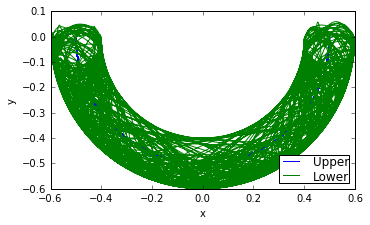

In [14]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
ax1.plot(x1, y1, label=r"Upper")
ax1.plot(x2, y2, label=r"Lower")
ax1.legend(loc='lower right', labelspacing=0.1, borderpad=0.01)
plt.xlabel('x')
plt.ylabel('y')
ax1.set_aspect(1)
fig.savefig('hola')

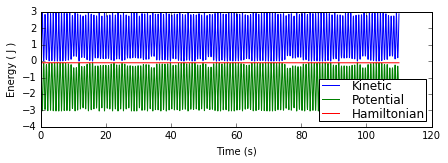

In [15]:
fig = plt.figure(figsize=(7,7))
ax2 = fig.add_subplot(311)
ax2.plot(t_range, T, label=r"Kinetic")
ax2.plot(t_range, V, label=r"Potential")
ax2.plot(t_range, E, label=r"Hamiltonian")
ax2.legend(loc='lower right', labelspacing=0.1, borderpad=0.01)
plt.xlabel('Time (s)')
plt.ylabel('Energy ( J )')
fig.savefig('hola')

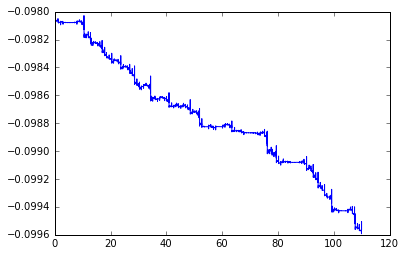

In [16]:
ax = plt.subplot(1, 1, 1)
ax.plot(t_range, E)

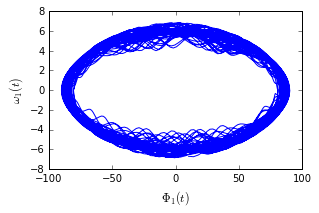

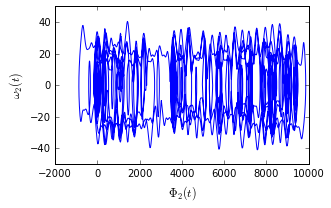

In [17]:
fig1 = plt.figure(figsize=(10,3))
ax1 = fig1.add_subplot(121)
ax1.plot(np.rad2deg(phi1), w1)
plt.xlabel('$\Phi_{1}(t)$', fontsize=12)
plt.ylabel('$\omega_{1}(t)$', fontsize=12)
plt.gcf().subplots_adjust(bottom=0.17)
fig1.savefig("popo")

fig2 = plt.figure(figsize=(10,3))
ax2 = fig2.add_subplot(122)
ax2.plot(np.rad2deg(phi2), w2)
plt.xlabel('$\Phi_{2}(t)$', fontsize=12)
plt.ylabel('$\omega_{2}(t)$', fontsize=12)
plt.gcf().subplots_adjust(bottom=0.17)
fig2.savefig("caca")

In [18]:
np.amax(phi1)

1.5707963267948966

In [10]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=1000000, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [3]:
import numpy as np
np.linspace(0, 10, num=41)

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ])

In [5]:
from scipy.interpolate import interp1d

In [ ]:
x = np.lins